<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S3E25__EDA_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S3E25 Mohs_Hardness - KAGGLE Competition**

Hardness, or the quantitative value of resistance to permanent or plastic deformation, plays a very crucial role in materials design in many applications, such as ceramic coatings and abrasives. Hardness testing is an especially useful method as it is non-destructive and simple to implement to gauge the plastic properties of a material. In this study, I proposed a machine, or statistical, learning approach to predict hardness in naturally occurring materials, which integrates atomic and electronic features from composition directly across a wide variety of mineral compositions and crystal systems. First, atomic and electronic features from the composition, such as van der Waals and covalent radii as well as the number of valence electrons, were extracted from the composition.

In this study, the author trained a set of classifiers to understand whether compositional features can be used to predict the Mohs hardness of minerals of different chemical spaces, crystal structures, and crystal classes. The dataset for training and testing the classification models used in this study originated from experimental Mohs hardness data, their crystal classes, and chemical compositions of naturally occurring minerals reported in the Physical and Optical Properties of Minerals CRC Handbook of Chemistry and Physics and the American Mineralogist Crystal Structure Database. The database is composed of 369 uniquely named minerals. Due to the presence of multiple composition combinations for minerals referred to by the same name, the first step was to perform compositional permutations on these minerals. This produced a database of 622 minerals of unique compositions, comprising 210 monoclinic, 96 rhombohedral, 89 hexagonal, 80 tetragonal, 73 cubic, 50 orthorhombic, 22 triclinic, 1 trigonal, and 1 amorphous structure. An independent dataset was compiled to validate the model performance. The validation dataset contains the composition, crystal structure, and Mohs hardness values of 51 synthetic single crystals reported in the literature. The validation dataset includes 15 monoclinic, 7 tetragonal, 7 hexagonal, 6 orthorhombic, 4 cubic, and 3 rhombohedral crystal structures.

In this study, the author constructed a database of compositional feature descriptors that characterize naturally occurring materials obtained directly from the Physical and Optical Properties of Minerals CRC Handbook45. This comprehensive compositional-based dataset allows us to train models that are able to predict hardness across a wide variety of mineral compositions and crystal classes. Each material in both the naturally occurring mineral and artificial single crystal datasets was represented by 11 atomic descriptors. The elemental features are the number of electrons, number of valence electrons, atomic number, Pauling electronegativity of the most common oxidation state, covalent atomic radii, van der Waals radii, and ionization energy of neutral.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Mineral_Dataset_Supplementary_Info.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [1]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
#!pip install MiniSom

In [2]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Using TensorFlow backend
Done, All the required modules are imported. Time elapsed: 13.549748182296753 sec


<Figure size 640x480 with 0 Axes>

In [3]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.0
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.2


### **1.1 Utility Functions**

#### Graph Functions:

In [4]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = desc['50%'].values
    return summ


def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(15, 5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette='viridis', ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}')
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)

    plt.tight_layout()
    plt.show()

def scatter_corr_plot(data_set=None, variables=None, target=None):
    if data_set is None or variables is None or target is None:
        raise ValueError("Please provide data_set and variables.")

    target = 'Hardness'

    full_features = data_set.columns.tolist()
    num_var = [column for column in data_set.columns if data_set[column].nunique() > 10]
    cat_var = [column for column in data_set.columns if data_set[column].nunique() < 10]


    num_rows = len(num_var)
    num_cols = 3

    total_plots = num_rows*num_cols
    plt.figure(figsize=(14,num_rows*2.5))

    for idx, col in enumerate(num_var):
        plt.subplot(num_rows, num_cols, idx % total_plots + 1)
        sns.scatterplot(x=col, y=target, data=data_set, color='#82B0D2',s=10)

        sns.regplot(x=col, y=target, data=data_set, scatter=False, color='#FA7F6F')

        corr_coef = data_set[target].corr(data_set[col])
        plt.text(0.95, 0.95, f"Corr: {corr_coef:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
        mean_value = data_set[col].mean()

        plt.axvline(x=mean_value, color='black', linestyle='--', linewidth=1, label='Mean Value')
        plt.title(f"{col} : {target}")

    plt.tight_layout()
    plt.show()

def correlation_plot(data_train=None, data_test=None, variables=None):
    if data_train is None or data_test is None or variables is None:
        raise ValueError("Please provide data_train, data_test and variables.")
    corr_matrix_train = data_train[variables].corr()
    corr_matrix_test = data_test[variables].corr()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10), gridspec_kw={'width_ratios': [0.80, 1.0]})
    sns.heatmap(corr_matrix_train, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[0], cbar = False)
    axes[0].set_title('Train Set', fontsize=15)

    sns.heatmap(corr_matrix_test, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[1], yticklabels=False, cbar = True, cbar_kws={"shrink": .50})
    axes[1].set_title('Test Set', fontsize=15)

    plt.suptitle('Correlation Matrices of Train and Test Sets', fontsize=25, weight = 'bold',y=0.9)
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    plt.show()

def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(10, 3.5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette=palette_1, ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}', fontsize=10)
        ax.set_xlabel(x_var, fontsize=7)
        ax.set_ylabel(y_var, fontsize=7)

    plt.tight_layout()
    plt.show()

def plot_boxplot_and_hist(data, variable):
   #figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
   f, (ax_box, ax_hist) = plt.subplots( 2, 1, sharex =False, gridspec_kw ={"height_ratios": (0.50, 0.85)}, figsize=(8,4))
   # assigning a graph to each ax
   sns.boxplot( x = data[variable], ax = ax_box)
   sns.histplot( data = data, x = variable, ax = ax_hist, bins=40)
   # Remove x axis name for the boxplot
   ax_box.set( xlabel ='')
   ax_box.set_title(variable)
   plt.tight_layout()


def diagnostic_plots( df, variable):
  plt.figure( figsize =(8,3))
  plt.subplot( 1, 2, 1)
  df[variable].hist( bins = 30)
  plt.title( f" Histogram of {variable}")
  plt.subplot( 1, 2, 2)
  stats.probplot( df[ variable], dist ="norm", plot = plt)
  plt.title( f" Q-Q plot of {variable}")
  plt.show()
  plt.tight_layout()

#### Data Analysis Functions

In [5]:
def adversarial_validation(data_train, data_test, target='Hardness',is_train_test="True"):

    adv_train = data_train.drop(target, axis = 1)
    adv_test = data_test.copy()
    if is_train_test==False:
      adv_test = adv_test.drop(target, axis = 1)

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1
    adv = pd.concat([adv_train, adv_test], ignore_index = True)
    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled['is_test']

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        adv_lr = XGBClassifier(random_state = 42)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (6, 6))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'Train-Test Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def search_high_corr_pairs(data_set = None, variables =None, threshold = 0.7):
    corr_matrix=data_set[variables].corr()
    high_corr_pairs=[]

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1,len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(f'\033[91m{corr_matrix.columns[i]}\033[0m and \033[91m{corr_matrix.columns[j]}\033[0m are highly linearly correlated, indicating the possibility of collinearity.')
                high_corr_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))
    return high_corr_pairs


def transform_features(train,test):
  train_ = train.copy()
  test_ = test.copy()

  feat_log_transf = ["allelectrons_Total","density_Total","allelectrons_Average","atomicweight_Average",
                     "ionenergy_Average","zaratio_Average","density_Average"]

  feat_power_transf = ["val_e_Average","R_vdw_element_Average","el_neg_chi_Average"]

  log_transformer = FunctionTransformer(lambda x: np.log(x+1.0))
  power_transformer = FunctionTransformer(lambda x: np.power(x,2.0))

  for feat in feat_log_transf:
    train_[feat] = log_transformer.transform(train_[feat])
    test_[feat] = log_transformer.transform(test_[feat])

  for feat in feat_power_transf:
    train_[feat] = power_transformer.transform(train_[feat])
    test_[feat] = power_transformer.transform(test_[feat])

  return train_, test_


def replace_zeros(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_.replace({0:np.nan},inplace=True)
  test_.replace({0:np.nan},inplace=True)

  train_["nan_marker"] = train_.isna().any(axis=1).astype("int")
  test_["nan_marker"] = test_.isna().any(axis=1).astype("int")

  total = pd.concat([train_, test_], ignore_index=True)
  total.drop("Hardness",axis=1,inplace=True)

  total_col = list(total.columns)

  imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state = 0)
  imputer.fit(total[total_col])
  train_[total_col] = imputer.transform(train_[total_col])
  test_[total_col] = imputer.transform(test_[total_col])

  return train_, test_

def clip_values(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_["allelectrons_Total"] = train_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)
  test_["allelectrons_Total"] = test_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)

  train_["allelectrons_Average"] = train_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)
  test_["allelectrons_Average"] = test_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)

  train_["val_e_Average"] = train_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["val_e_Average"] = test_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["atomicweight_Average"] = train_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["atomicweight_Average"] = test_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["density_Total"] = train_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)
  test_["density_Total"] = test_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)

  train_["el_neg_chi_Average"] = train_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)
  test_["el_neg_chi_Average"] = test_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)

  train_["R_vdw_element_Average"] = train_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)
  test_["R_vdw_element_Average"] = test_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)

  train_["R_cov_element_Average"] = train_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)
  test_["R_cov_element_Average"] = test_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)

  train_["zaratio_Average"] = train_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)
  test_["zaratio_Average"] = test_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)

  train_["density_Average"] = train_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)
  test_["density_Average"] = test_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)

  train_["ionenergy_Average"] = train_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)
  test_["ionenergy_Average"] = test_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)


  return train_, test_

def prepare_dataset(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_,test_ = transform_features(train_,test_)
  train_,test_ = replace_zeros(train_,test_)
  train_,test_ = clip_values(train_,test_)

  return train_, test_

### **1.2 Connect Drives**

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [7]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E25_Mohs_Hardness"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/neural_networks/"

list_directories = [folder_data,models_folders,folders_nn]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")


os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E25_Mohs_Hardness already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/neural_networks/ already exists


## 2.0 Create Datasets

In [9]:
train = pd.read_csv('train.csv')
old_train = pd.read_csv("Mineral_Dataset_Supplementary_Info.csv", index_col = 0)
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv('sample_submission.csv')

# Drop column id
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)
old_train.dropna(inplace=True)

In [10]:
print("TRAIN DATA shape: {}".format(train.shape))
display(train.head(3))
print("OLD-TRAIN DATA: {}".format(old_train.shape))
display(old_train.head(3))
print("TEST DATA: {}".format(test.shape))
display(test.head(3))

TRAIN DATA shape: (10407, 12)


allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0               100.0       0.841611                  10.0            4.8   
1               100.0       7.558488                  10.0            4.8   
2                76.0       8.885992                  15.6            5.6   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0             20.612526           11.08810               2.766   
1             20.298893           12.04083               2.755   
2             33.739258           12.08630               2.828   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                  1.732                  0.860         0.496070   
1                  1.631                  0.910         0.492719   
2                  1.788                  0.864         0.481478   

   density_Average  Hardness  
0          0.91457       6.0  
1          0.71760       6.5  
2          1.50633       2.5

OLD-TRAIN DATA: (622, 12)


Hardness  allelectrons_Total  density_Total  allelectrons_Average  \
0       2.3               110.0      23.000000             36.666667   
1       5.5               406.0      30.472136              9.902439   
2       5.5               406.0      30.472464             10.410256   

   val_e_Average  atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0       2.666667             82.598467           8.504133            2.146667   
1       4.682927             19.813180          11.456151            2.700244   
2       4.923077             20.931371          11.541405            2.753590   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0               2.006667               1.253333         0.456803   
1               1.676829               0.868293         0.522909   
2               1.703846               0.894359         0.497498   

   density_Average  
0         7.666667  
1         0.743223  
2         0.781345

TEST DATA: (6939, 11)


allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
0               884.0     121.420000                 35.36           5.28   
1                90.0       9.931960                 18.00           5.60   
2               116.0       7.767992                 11.60           4.80   

   atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
0             82.561240           9.370384               2.298   
1             39.568056          12.086300               2.868   
2             23.231818          11.023840               2.644   

   R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
0                 1.9072                  1.200         0.461899   
1                 1.6520                  0.864         0.476196   
2                 1.7940                  0.960         0.499514   

   density_Average  
0          1.79459  
1          1.41194  
2          0.78834

In [11]:
target = 'Hardness'

full_features = test.columns.tolist()
num_var = [column for column in test.columns if test[column].nunique() > 10]
cat_var = [column for column in test.columns if test[column].nunique() < 10]

In [12]:
summary(train).style.background_gradient(cmap='Blues')

data shape: (10407, 12)


In [13]:
summary(test).style.background_gradient(cmap='Blues')

data shape: (6939, 11)


**CONSIDERATIONS**

* Train-Test have no NaN
* allelectrons_Total is on a very different scale
* All features are non-negative.



In [14]:
#adversarial_validation(data_train=train, data_test=test, target='Hardness')

In [15]:
#adversarial_validation(data_train=train, data_test=old_train, target='Hardness',is_train_test=False)

**CONSIDERATIONS**

* Train-Test have similar distributions
* New and Old Train data are similar, and therefore merged

In [16]:
train = pd.concat([train, old_train], ignore_index=True)
train = train.drop_duplicates()
train.shape

total = pd.concat([train, test], ignore_index=True)

train.shape, total.shape

((11006, 12), (17945, 12))

## 3.0 EDA

### **3.1 Correlation Analysis**

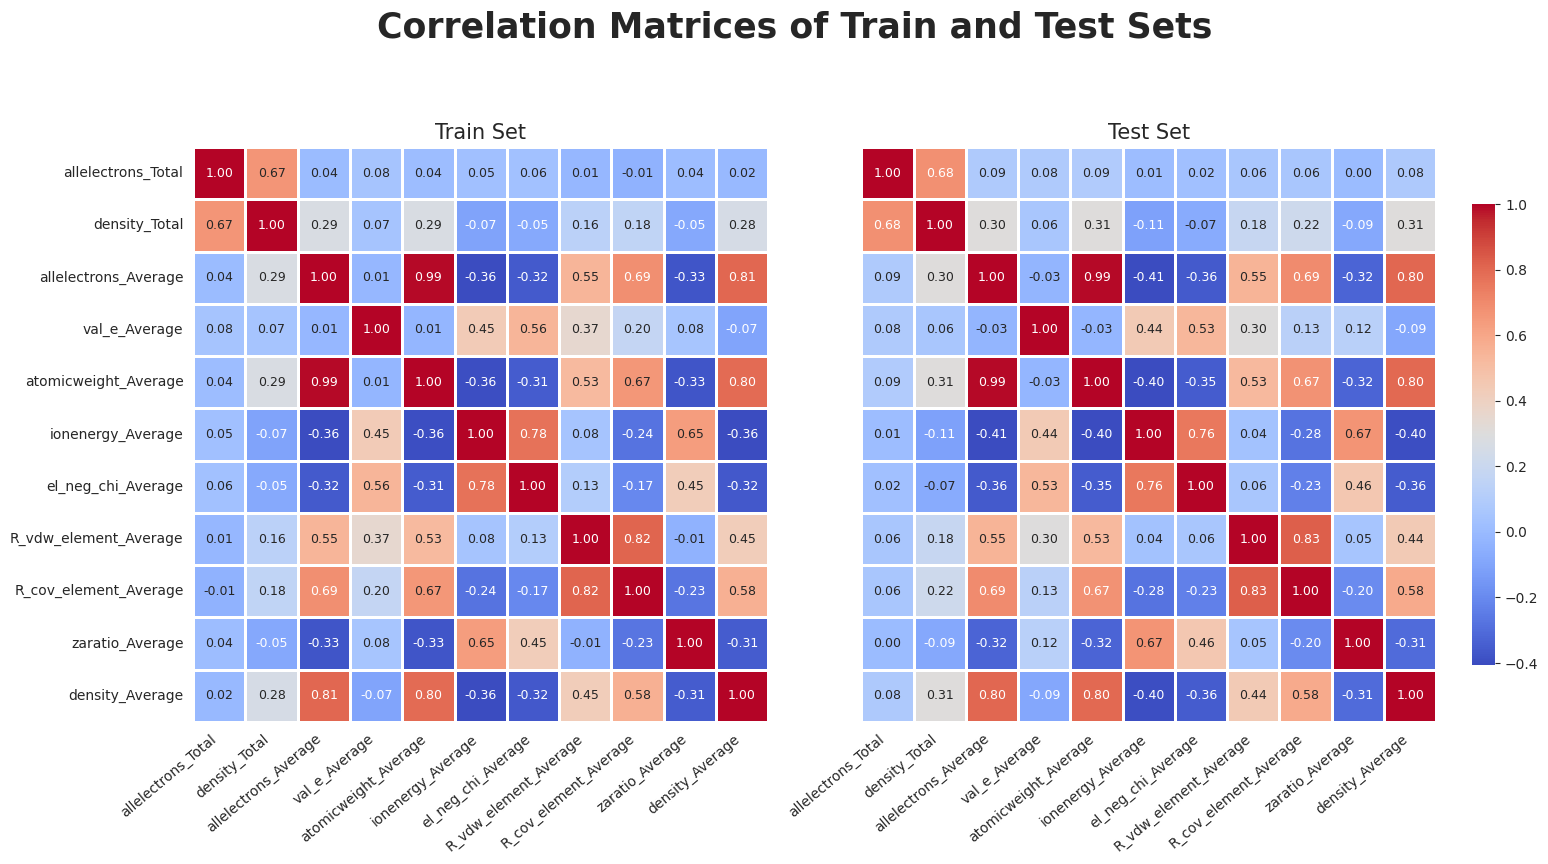

In [17]:
correlation_plot(data_train=train,data_test=test,variables=num_var)

In [18]:
high_corr_pairs = search_high_corr_pairs(data_set=train, variables=num_var)

allelectrons_Average and atomicweight_Average are highly linearly correlated, indicating the possibility of collinearity.
allelectrons_Average and density_Average are highly linearly correlated, indicating the possibility of collinearity.
atomicweight_Average and density_Average are highly linearly correlated, indicating the possibility of collinearity.
ionenergy_Average and el_neg_chi_Average are highly linearly correlated, indicating the possibility of collinearity.
R_vdw_element_Average and R_cov_element_Average are highly linearly correlated, indicating the possibility of collinearity.


In [19]:
high_corr_pairs

[('allelectrons_Average', 'atomicweight_Average'),
 ('allelectrons_Average', 'density_Average'),
 ('atomicweight_Average', 'density_Average'),
 ('ionenergy_Average', 'el_neg_chi_Average'),
 ('R_vdw_element_Average', 'R_cov_element_Average')]

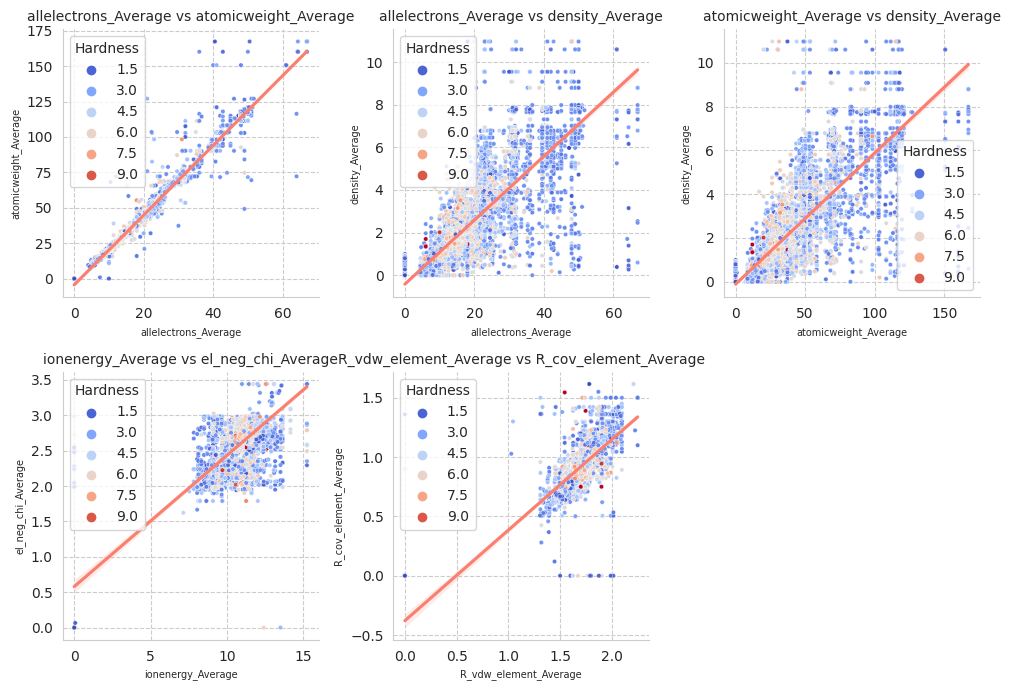

In [20]:
scatter_plot_high_corr_pair(data_set=train, target=target, variable_pairs=high_corr_pairs)

**Observation:**
- Some variables have outliers.
- Some variables show a positive correlation with the target variable.
- When both `allelectrons_Average` and `density_Average` are relatively high, `Hardness` tends to be low.

### 3.2 Features Analysis:

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11006 entries, 0 to 11028
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     11006 non-null  float64
 1   density_Total          11006 non-null  float64
 2   allelectrons_Average   11006 non-null  float64
 3   val_e_Average          11006 non-null  float64
 4   atomicweight_Average   11006 non-null  float64
 5   ionenergy_Average      11006 non-null  float64
 6   el_neg_chi_Average     11006 non-null  float64
 7   R_vdw_element_Average  11006 non-null  float64
 8   R_cov_element_Average  11006 non-null  float64
 9   zaratio_Average        11006 non-null  float64
 10  density_Average        11006 non-null  float64
 11  Hardness               11006 non-null  float64
dtypes: float64(12)
memory usage: 1.1 MB


#### 3.2.1 allelectrons_Total

In [22]:
#plot_boxplot_and_hist(train,"allelectrons_Total")
#diagnostic_plots(train, "allelectrons_Total");

In [23]:
#train_tf=train[["allelectrons_Total"]].copy()
#train_tf = np.log(train_tf+1)
#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)

In [24]:
#plot_boxplot_and_hist(train_tf,"allelectrons_Total")
#diagnostic_plots(train_tf, "allelectrons_Total");

In [25]:
#test_tf=test[["allelectrons_Total"]].copy()
#test_tf = np.log(test_tf+1)

#plot_boxplot_and_hist(test_tf,"allelectrons_Total")
#diagnostic_plots(test_tf, "allelectrons_Total");

In [26]:
#test_tf

**NOTES**

- Log transformation required
- 0 is an outlier or a NaN in disguise.

#### 3.2.2 density_Total   

In [27]:
#plot_boxplot_and_hist(train,"density_Total")
#diagnostic_plots(train, "density_Total");

In [28]:
#train_tf=train[["density_Total"]].copy()
#train_tf = np.log(train_tf+1)
#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)

In [29]:
#plot_boxplot_and_hist(train_tf,"density_Total")
#diagnostic_plots(train_tf, "density_Total");

**NOTES**

- Log transformation required
- 0 is an outlier or a NaN in disguise.

#### 3.2.3 allelectrons_Average      

In [30]:
#plot_boxplot_and_hist(train,"allelectrons_Average")
#diagnostic_plots(train, "allelectrons_Average");

In [31]:
#train_tf=train[["allelectrons_Average"]].copy()
#train_tf = np.log(train_tf+1)
#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)
#train_tf = train_tf.clip(1.5)
#train_tf.min()

In [32]:
#plot_boxplot_and_hist(train_tf,"allelectrons_Average")
#diagnostic_plots(train_tf, "allelectrons_Average");

**NOTES**

- Log transformation required
- 0 is an outlier or a NaN in disguise.

#### 3.2.4 val_e_Average      

In [33]:
#plot_boxplot_and_hist(train,"val_e_Average")
#diagnostic_plots(train, "val_e_Average");

In [34]:
#train_tf=train[["val_e_Average"]].copy()

#transformer = FunctionTransformer(lambda x: np.power( x, 2.0))
#train_tf = transformer.transform(train_tf)

#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)
#train_tf = train_tf.clip(2.0)

In [35]:
#plot_boxplot_and_hist(train_tf,"val_e_Average")
#diagnostic_plots(train_tf, "val_e_Average");

**NOTES**

- Power transformation required
- 0 is an outlier or a NaN in disguise.

#### 3.2.5 atomicweight_Average      

In [36]:
#plot_boxplot_and_hist(train,"atomicweight_Average")
#diagnostic_plots(train, "atomicweight_Average");

In [37]:
#train_tf=train[["atomicweight_Average"]].copy()

#transformer = FunctionTransformer(lambda x: np.log(x+1))
#train_tf = transformer.transform(train_tf)
#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)
#train_tf = train_tf.clip(2.0)

In [38]:
#plot_boxplot_and_hist(train_tf,"atomicweight_Average")
#diagnostic_plots(train_tf, "atomicweight_Average");

**NOTES**

- Log transformation required
- 0 is an outlier or a NaN in disguise.

#### 3.2.6 ionenergy_Average      

In [39]:
#plot_boxplot_and_hist(train,"ionenergy_Average")
#diagnostic_plots(train, "ionenergy_Average");

In [40]:
#train_tf=train[["ionenergy_Average"]].copy()#

#transformer = FunctionTransformer(lambda x: np.log(x+1))
#train_tf = transformer.transform(train_tf)
#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)
#train_tf = train_tf.clip(2.0)

In [41]:
#plot_boxplot_and_hist(train_tf,"ionenergy_Average")
#diagnostic_plots(train_tf, "ionenergy_Average");

**NOTES**

- Log transformation required
- 0 is an outlier or a NaN in disguise.
- Possibility to clip left tail values to about 2.1

#### 3.2.7 el_neg_chi_Average      

In [42]:
#plot_boxplot_and_hist(train,"el_neg_chi_Average")
#diagnostic_plots(train, "el_neg_chi_Average");

In [43]:
#train_tf=train[["el_neg_chi_Average"]].copy()

#transformer = FunctionTransformer(lambda x: np.power(x,2))
#train_tf = transformer.transform(train_tf)
#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)
#train_tf = train_tf.clip(2.0)

In [44]:
#plot_boxplot_and_hist(train_tf,"el_neg_chi_Average")
#diagnostic_plots(train_tf, "el_neg_chi_Average");

**NOTES**

- Log transformation required
- 0 is an outlier or a NaN in disguise.
- Possibility to clip left tail values to about 1.0

#### 3.2.8 R_vdw_element_Average      

In [45]:
#plot_boxplot_and_hist(train,"R_vdw_element_Average")
#diagnostic_plots(train, "R_vdw_element_Average");

In [46]:
#train_tf=train[["R_vdw_element_Average"]].copy()

#transformer = FunctionTransformer(lambda x: np.power(x,2.0))
#train_tf = transformer.transform(train_tf)
#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)

In [47]:
#plot_boxplot_and_hist(train_tf,"R_vdw_element_Average")
#diagnostic_plots(train_tf, "R_vdw_element_Average");

**NOTES**

- Power transformation required
- 0 is an outlier or a NaN in disguise.

#### 3.2.9 R_cov_element_Average      

In [48]:
#plot_boxplot_and_hist(train,"R_cov_element_Average")
#diagnostic_plots(train, "R_cov_element_Average");

In [49]:
#train_tf=train[["R_cov_element_Average"]].copy()

#transformer = FunctionTransformer(lambda x: np.power(x,2.0))
#train_tf = transformer.transform(train_tf)
#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)
#train_tf = train_tf.clip(0.25)

In [50]:
#plot_boxplot_and_hist(train_tf,"R_cov_element_Average")
#diagnostic_plots(train_tf, "R_cov_element_Average");

**NOTES**

- Power transformation required
- 0 is an outlier or a NaN in disguise.
- Clip at 0.25

#### 3.2.10 zaratio_Average      

In [51]:
#plot_boxplot_and_hist(train,"zaratio_Average")
#diagnostic_plots(train, "zaratio_Average");

In [52]:
#train_tf=train[["zaratio_Average"]].copy()

#transformer = FunctionTransformer(lambda x: np.power(x,2))
#train_tf = transformer.transform(train_tf)

#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)
#train_tf = train_tf.clip(lower=None, upper=0.55)

In [53]:
#plot_boxplot_and_hist(train_tf,"zaratio_Average")
#diagnostic_plots(train_tf, "zaratio_Average");

**NOTES**

- Log transformation required
- 0 is an outlier or a NaN in disguise.

#### 3.2.11 density_Average      

In [54]:
#plot_boxplot_and_hist(train,"density_Average")
#diagnostic_plots(train, "density_Average");

In [55]:
#train_tf=train[["density_Average"]].copy()

#transformer = FunctionTransformer(lambda x: np.log(x+1))
#train_tf = transformer.transform(train_tf)

#train_tf.replace({0:np.nan},inplace=True)
#train_tf.dropna(inplace=True)
#train_tf = train_tf.clip(lower=None, upper=0.55)

In [56]:
#plot_boxplot_and_hist(train_tf,"density_Average")
#diagnostic_plots(train_tf, "density_Average");

**NOTES**

- Log transformation required
- 0 is an outlier or a NaN in disguise.

#### 3.2.12 Hardness      

In [57]:
#plot_boxplot_and_hist(train,"Hardness")
#diagnostic_plots(train, "Hardness");

#### 3.2.13 **Conclusions:**

* 0 across all features rapresents a *Missing Value*. Therefore, needs to be replaced by np.nan and a strategy to populate missign values needs to be defined.
* log-Transformation is applied to the following features:

  1. allelectrons_Total
  2. density_Total
  3. allelectrons_Average
  4. atomicweight_Average
  5. ionenergy_Average
  6. el_neg_chi_Average
  7. zaratio_Average
  8. density_Average

* Power-Transformation is applied to the following features:

  1. val_e_Average
  2. R_vdw_element_Average

* Some Features might need to be right-clipped after replacing np.nan
  
  


### 3.3 Transform Data:

In [58]:
%%time
train_,test_ = prepare_dataset(train,test)

CPU times: user 10.9 s, sys: 12.5 s, total: 23.5 s
Wall time: 14 s


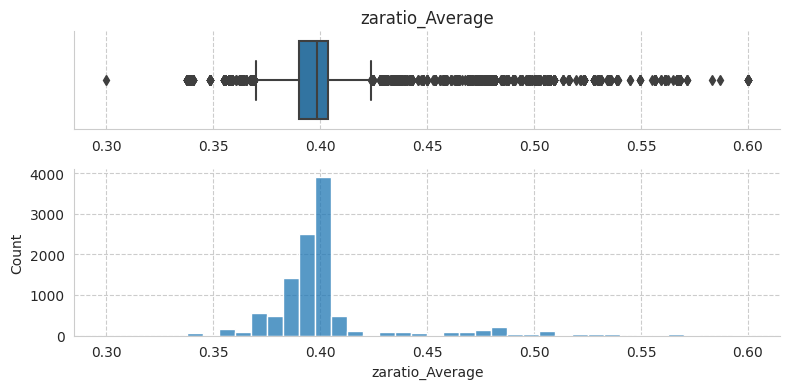

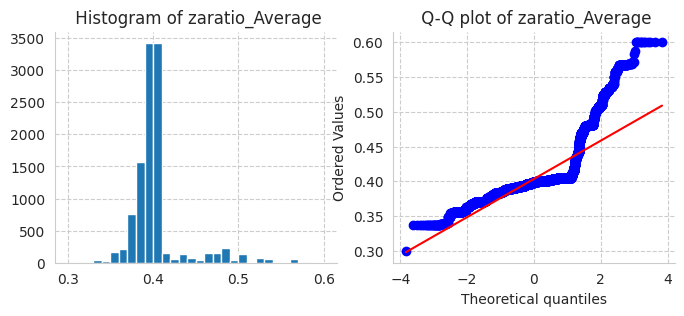

<Figure size 640x480 with 0 Axes>

In [59]:
#train_["ionenergy_Average"].clip(lower=2.1,upper=None,inplace=True)
plot_boxplot_and_hist(train_,"zaratio_Average")
diagnostic_plots(train_, "zaratio_Average");

In [60]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11006 entries, 0 to 11028
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     11006 non-null  float64
 1   density_Total          11006 non-null  float64
 2   allelectrons_Average   11006 non-null  float64
 3   val_e_Average          11006 non-null  float64
 4   atomicweight_Average   11006 non-null  float64
 5   ionenergy_Average      11006 non-null  float64
 6   el_neg_chi_Average     11006 non-null  float64
 7   R_vdw_element_Average  11006 non-null  float64
 8   R_cov_element_Average  11006 non-null  float64
 9   zaratio_Average        11006 non-null  float64
 10  density_Average        11006 non-null  float64
 11  Hardness               11006 non-null  float64
 12  nan_marker             11006 non-null  float64
dtypes: float64(13)
memory usage: 1.2 MB


In [61]:
train_.isna().sum()

allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
nan_marker               0
dtype: int64

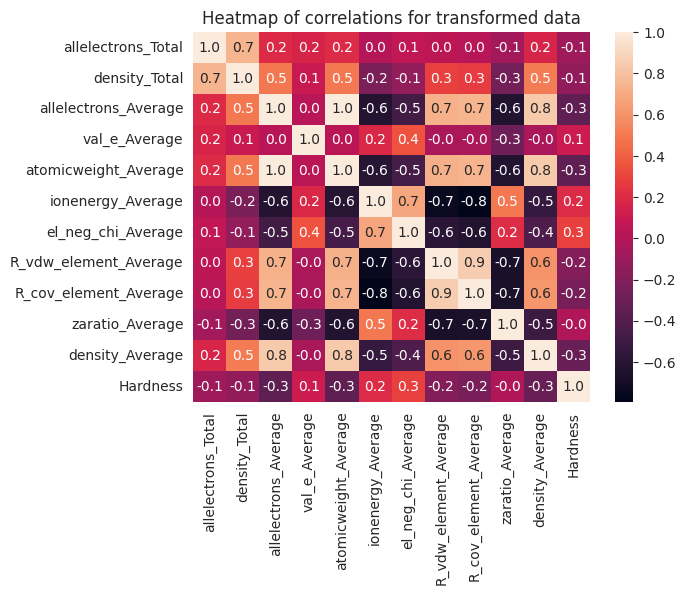

In [62]:
num_var = list(train_.columns)[:-1]
sns.heatmap(data=train_[num_var].corr(), annot=True, fmt=".1f")
plt.title('Heatmap of correlations for transformed data');

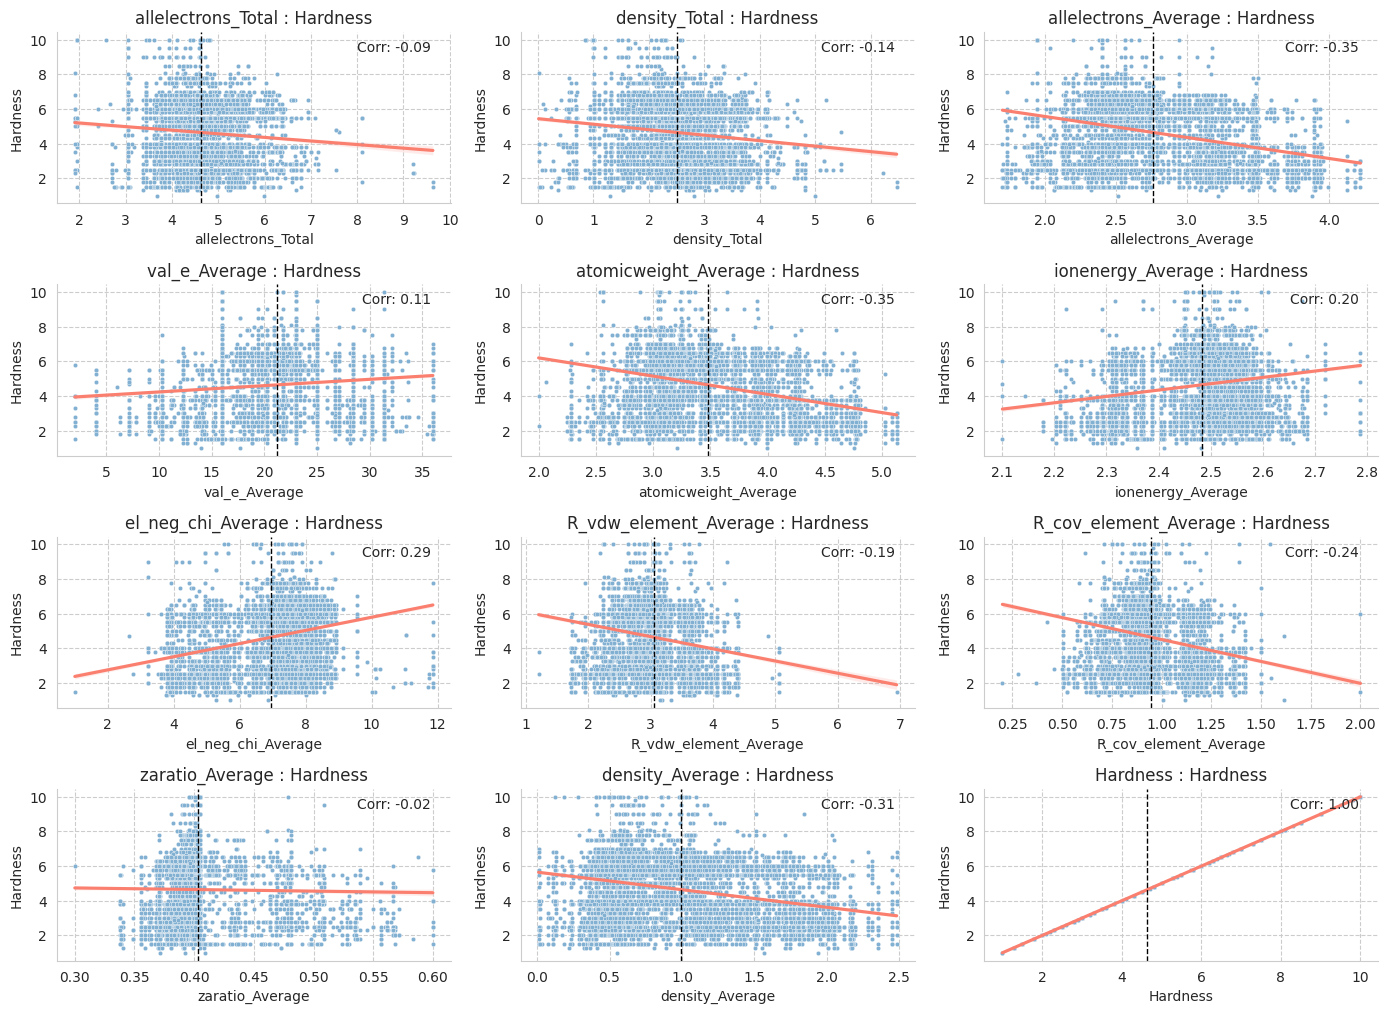

In [63]:
scatter_corr_plot(data_set=train_, variables=num_var, target='Hardness')

## 4.0 Feature Engeneering:

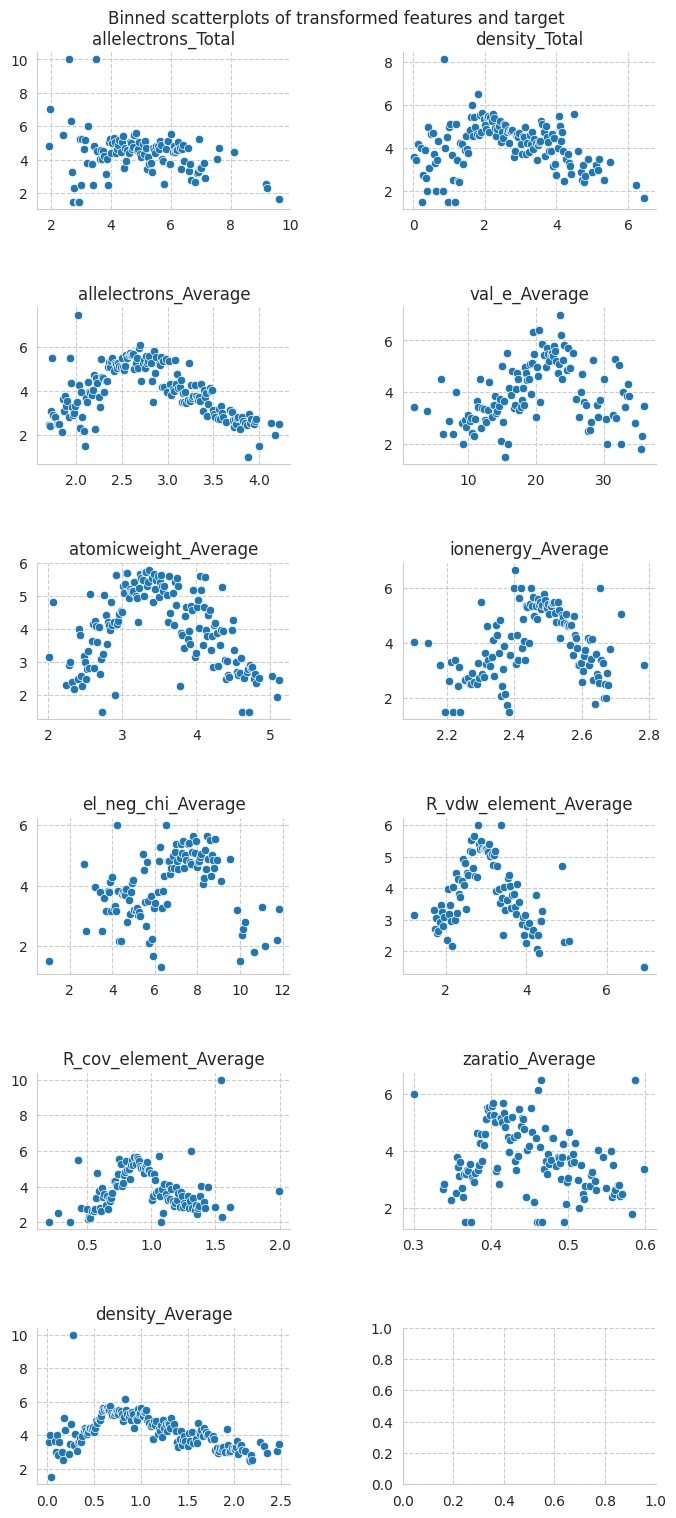

In [64]:
from scipy import stats

num_var = list(train_.columns)[:-1]

fig, axes = plt.subplots(6, 2, figsize=(8, 16))
fig.tight_layout(pad=5.0)
fig.suptitle('Binned scatterplots of transformed features and target')
for i, ax in enumerate(fig.axes):
    col = train_[num_var].columns.tolist()[i]
    if col == 'Hardness':
        continue
    bin_means, bin_edges, binnumber = stats.binned_statistic(train_[col],
                                                             train_['Hardness'],
                                                             'mean', bins = 200)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    sns.scatterplot(ax=ax, x=bin_centers, y=bin_means)
    ax.set_title(col)

In [65]:
total_ = pd.concat([train_, test_], ignore_index=True)

train.shape, test.shape, total.shape

((11006, 12), (6939, 11), (17945, 12))

In [66]:
total_["awa_cat"] = pd.qcut(total["atomicweight_Average"], 6, labels=list(range(6)))
total_["awa_cat"] = total_["awa_cat"].astype("int32")
total_["nan_marker"] = total_["nan_marker"].astype("int32")

In [67]:
train_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11006 entries, 0 to 11028
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   allelectrons_Total     11006 non-null  float64
 1   density_Total          11006 non-null  float64
 2   allelectrons_Average   11006 non-null  float64
 3   val_e_Average          11006 non-null  float64
 4   atomicweight_Average   11006 non-null  float64
 5   ionenergy_Average      11006 non-null  float64
 6   el_neg_chi_Average     11006 non-null  float64
 7   R_vdw_element_Average  11006 non-null  float64
 8   R_cov_element_Average  11006 non-null  float64
 9   zaratio_Average        11006 non-null  float64
 10  density_Average        11006 non-null  float64
 11  Hardness               11006 non-null  float64
 12  nan_marker             11006 non-null  float64
dtypes: float64(13)
memory usage: 1.2 MB


### 4.1 Relationship Features:

In [68]:
df = total_.copy()
# Interaction Features
#df['R_cov_R_vdw'] = df['R_cov_element_Average'] ** df['R_vdw_element_Average']  # Ratio of covalent to van der Waals radii
#df['electron_density'] = df['allelectrons_Total'] + df['density_Total']  # Electron density
#df['electronegativity_density'] = df['el_neg_chi_Average'] * df['density_Average']  # Electronegativity times density

# Polynomial Features
#df['val_e_Average_squared'] = df['val_e_Average'] ** 2  # Square of the number of valence electrons

# Grouping Features
df['grouped_atomicweight'] = df['atomicweight_Average'].apply(lambda x: 1 if x > df['atomicweight_Average'].median() else 0)  # Grouping based on median of atomicweight_Average

# New feature: Difference between covalent and van der Waals radii
#df['R_diff'] = df['R_cov_element_Average'] - df['R_vdw_element_Average']

# New feature: Average atomic weight per valence electron
#df['atomicweight_valence'] = df['atomicweight_Average'] * df['val_e_Average']

# New feature: Density per valence electron
df['density_per_valence'] = df['density_Average'] ** df['val_e_Average']
#df['density_per_valence'] = np.log(df['density_per_valence']+0.1)
# New feature: Interaction between electronegativity and ionization energy
#df['el_neg_ionenergy_interaction'] = df['el_neg_chi_Average'] ** df['ionenergy_Average']

# New feature: Interaction between atomic weight and density
#df['atomicweight_density_interaction'] = df['atomicweight_Average'] * df['density_Average']

# New feature: Ratio of valence electrons to ionization energy
#df['val_e_ionenergy'] = df['val_e_Average'] * df['ionenergy_Average']

# New feature: Combined feature based on multiple columns
df['combined_feature'] = df['R_cov_element_Average'] * df['el_neg_chi_Average'] / (df['ionenergy_Average'] + 1)

# New feature: Absolute difference between atomic weight and density
df['atomicweight_density_diff'] = np.abs(df['atomicweight_Average'] - df['density_Average'])

# New feature: Squared difference between electronegativity and ionization energy
#df['el_neg_ionenergy_diff_squared'] = (df['el_neg_chi_Average'] - df['ionenergy_Average']) ** 2

In [69]:
#Check remaining missing values if any
df_na = (df.drop(columns= target).isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
if df_na.isna().sum()==0:
    print("-----------------")
    print("|No NULL values.|")
    print("-----------------")
else:
    print("--------------")
    print("NULL values:",df_na.head())
    print("--------------")

-----------------
|No NULL values.|
-----------------


In [70]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    inf_check = np.isinf(df[col])
    if inf_check.any():
        print(f"Column {col} contains infinite values.")

In [71]:
from scipy.stats import skew
numeric_feats = df.drop(columns=[target]).dtypes[df.dtypes.isin([np.dtype('float64')])].index

# Check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.reset_index().sort_values(by="index")


Skew in numerical features: 



index        Skew
6       R_cov_element_Average    0.640866
7       R_vdw_element_Average    0.582331
4        allelectrons_Average    0.734320
8          allelectrons_Total    0.384687
5        atomicweight_Average    0.714045
2   atomicweight_density_diff    1.251551
10           combined_feature    0.075765
3             density_Average    0.784986
9               density_Total    0.121454
0         density_per_valence  133.849496
12         el_neg_chi_Average   -0.794687
13          ionenergy_Average   -0.848506
11              val_e_Average   -0.122045
1             zaratio_Average    2.590578

In [72]:
skewness = skewness[abs(skewness) > 0.85].dropna()
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
print("----------------------------------------------------------------")
print("Skewed features")
for i in skewness[skewness.notna().all(axis=1)].index:
    print ("▷",i)

skewed_features = skewness.index
lam = 0.15
df["density_per_valence"] = boxcox(df[["density_per_valence"]], 0.01)
df["zaratio_Average"] = boxcox1p(df["zaratio_Average"], 0.15)
df["atomicweight_density_diff"] = boxcox1p(df["atomicweight_density_diff"], 0.5)

There are 3 skewed numerical features to Box Cox transform
----------------------------------------------------------------
Skewed features
▷ density_per_valence
▷ zaratio_Average
▷ atomicweight_density_diff


In [73]:
train_ = df.iloc[:11006,:]
test_ = df.iloc[11006:,:]

display(train_.tail(3))
display(test_.head(3))

allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
11003            3.663562       2.096094              2.995732      16.000000   
11004            4.465908       2.286591              2.730029      25.000000   
11005            5.424950       2.955139              2.422386      22.347107   

       atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
11003              3.730250           2.526221            6.477025   
11004              3.451595           2.529163            8.018336   
11005              3.075106           2.497227            7.302278   

       R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
11003               3.115225               0.920000         0.338811   
11004               3.010225               0.890000         0.343939   
11005               2.874566               0.875455         0.358892   

       density_Average  Hardness  nan_marker  awa_cat  grouped_atomicweight  \
11003         1.518893       4.0           0        4                     1   
11004         0.905656       7.5           0        3                     1   
11005         0.602934       6.0           0        1                     0   

       density_per_valence  combined_feature  atomicweight_density_diff  
11003             6.916404          1.689872                   1.584052  
11004            -2.446951          2.022100                   1.766133  
11005           -10.690708          1.827966                   1.726753

allelectrons_Total  density_Total  allelectrons_Average  val_e_Average  \
11006            6.785588       4.807458              3.593469        27.8784   
11007            4.510860       2.391691              2.944439        31.3600   
11008            4.762174       2.171108              2.533697        23.0400   

       atomicweight_Average  ionenergy_Average  el_neg_chi_Average  \
11006              4.425580           2.338954            5.280804   
11007              3.702981           2.571566            8.225424   
11008              3.187667           2.486891            6.990736   

       R_vdw_element_Average  R_cov_element_Average  zaratio_Average  \
11006               3.637412                  1.200         0.329790   
11007               2.729104                  0.864         0.337171   
11008               3.218436                  0.960         0.348964   

       density_Average  Hardness  nan_marker  awa_cat  grouped_atomicweight  \
11006         1.027685       NaN           0        5                     1   
11007         0.880431       NaN           0        4                     1   
11008         0.581288       NaN           0        2                     0   

       density_per_valence  combined_feature  atomicweight_density_diff  
11006             0.764239          1.897889                   2.194231  
11007            -3.914796          1.989818                   1.910268  
11008           -11.749792          1.924668                   1.798094

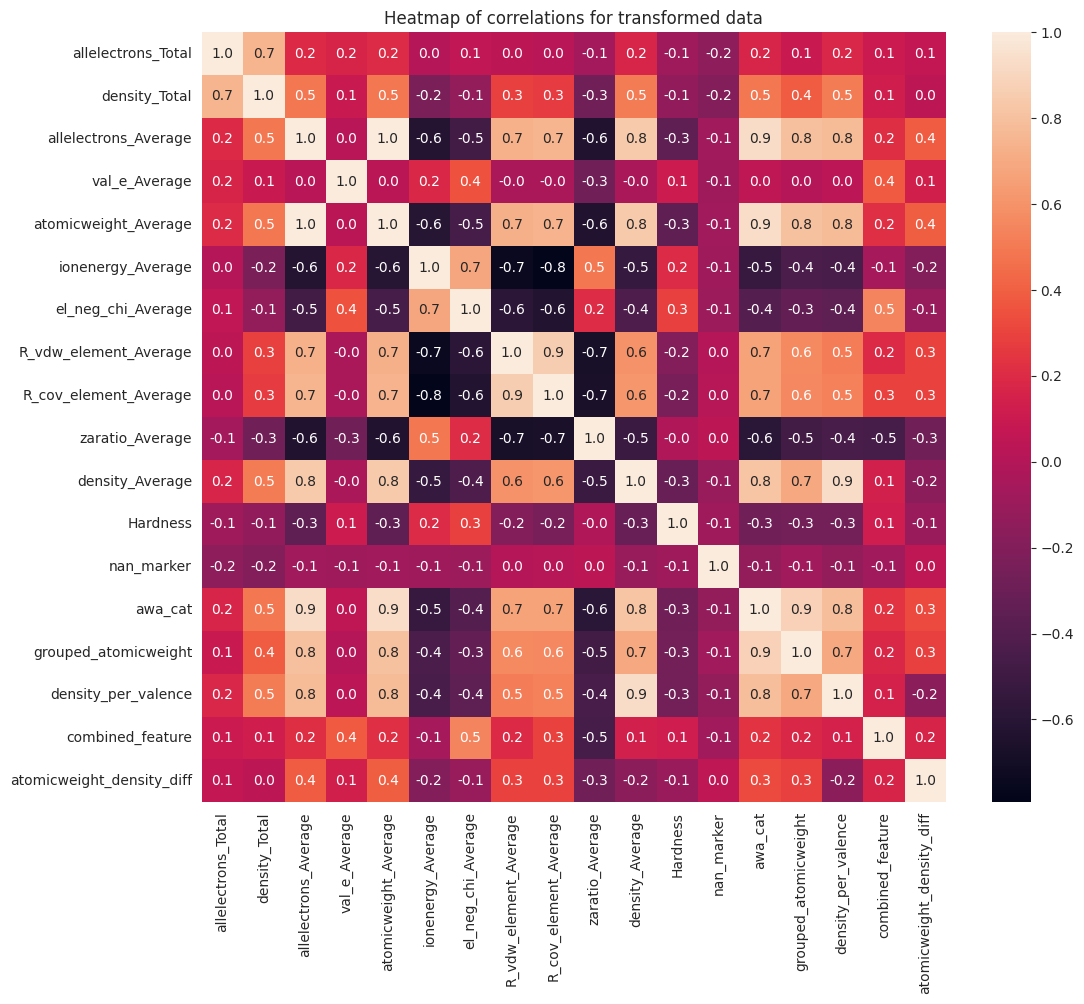

In [74]:
num_var = list(train_.columns)
plt.figure(figsize=(12,10))
sns.heatmap(data=train_[num_var].corr(), annot=True, fmt=".1f")
plt.title('Heatmap of correlations for transformed data');

In [75]:
pairs = [('allelectrons_Average', 'val_e_Average'),
         ("allelectrons_Average","density_Total"),
         ("R_vdw_element_Average","val_e_Average"),
         ("R_vdw_element_Average","density_Average"),
         ("density_Total","val_e_Average"),
         ("zaratio_Average","val_e_Average"),
         ("density_per_valence","density_Average")]

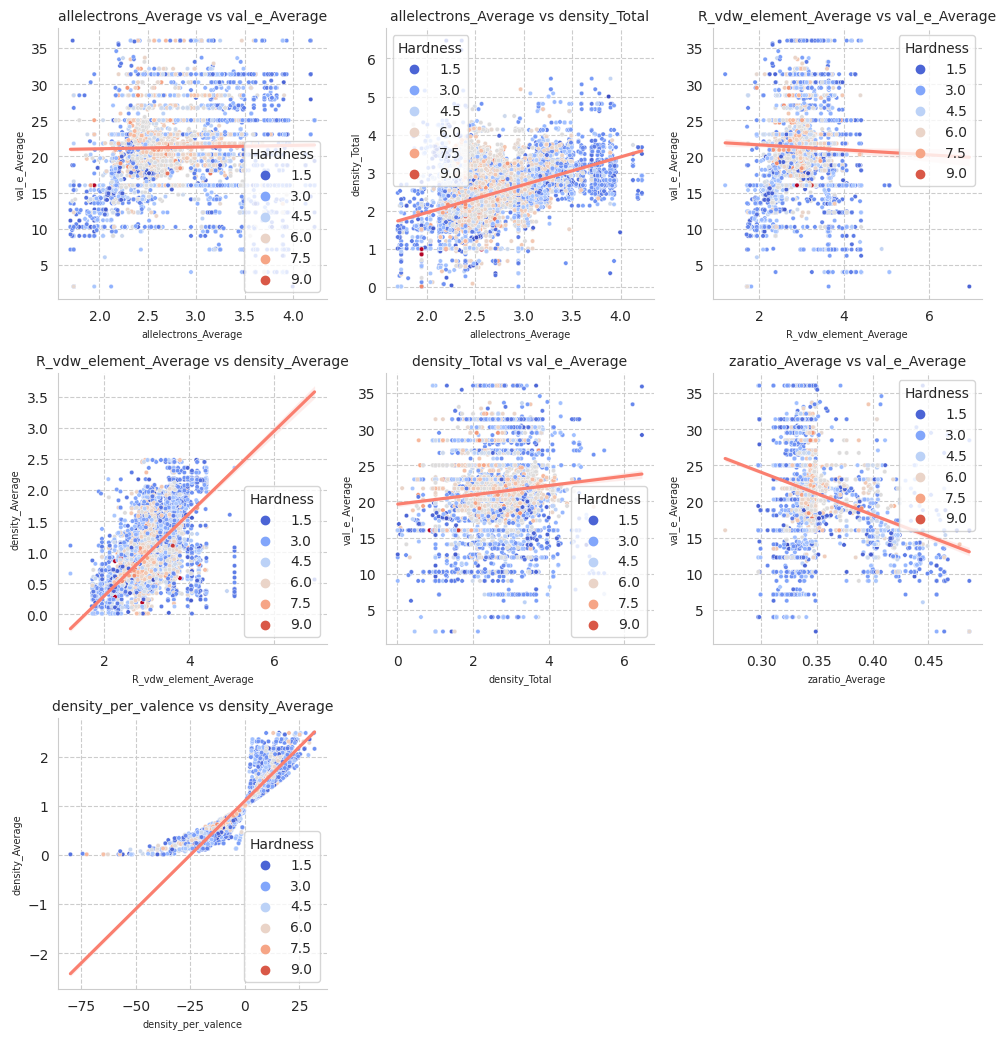

In [76]:
scatter_plot_high_corr_pair(data_set=train_, target=target, variable_pairs=pairs)

In [77]:
train_.drop(columns=['atomicweight_Average'],inplace=True)
test_.drop(columns=['atomicweight_Average'],inplace=True)

### 4.2 Tree Based Features:

In [78]:
from itertools import combinations
list_col = list(train_.drop(columns="Hardness").columns)
comb = list(combinations(list_col,2))

#for a, b in enumerate(comb):
#  print("{}: {}".format(a,list(b)))

#### Test all the Combinations:

In [1]:
"""
tree_features_df = pd.DataFrame(index=range(len(comb)), columns=["feat_0", "feat_1", "Score", "target_corr", 'max_depth', 'min_samples_leaf', 'min_samples_split'])
train_trees = train_.copy()

for a, b in enumerate(comb):

  tree_features = list(b)
  tree_features_df.loc[a,"feat_0"] = tree_features[0]
  tree_features_df.loc[a,"feat_1"] = tree_features[1]

  X_train = train_trees.loc[:,tree_features]
  y_train = train_trees.loc[:,"Hardness"]


  param_grid = {
                "max_depth": [7,8,9,10,11,12,13,14,15,20],
                "min_samples_split":[2,6,10,12,15,20],
                "min_samples_leaf":[1,2,3,6,10,15]
                }

  tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=0)
  tree_model.fit(X_train, y_train)

  tree_features_df.loc[a,"Score"] = tree_model.best_score_
  tree_features_df.loc[a,"max_depth"] = tree_model.best_params_.get("max_depth")
  tree_features_df.loc[a,"min_samples_leaf"] = tree_model.best_params_.get("min_samples_leaf")
  tree_features_df.loc[a,"min_samples_split"] = tree_model.best_params_.get("min_samples_split")

  estimator = tree_model.best_estimator_

  current_directory = os.getcwd()

  os.chdir("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/feat_eng")
  joblib.dump(estimator, "tree_feature_model_v{}.joblib".format(a))
  os.chdir(current_directory)

  os.chdir("//content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/feat_eng")
  estimator = joblib.load("tree_feature_model_v{}.joblib".format(a))
  os.chdir(current_directory)

  train_trees["tree_feat"] = estimator.predict(train_[tree_features])

  corr = np.corrcoef(train_trees["tree_feat"], train_trees["Hardness"])[0, 1]
  corr = np.round(corr, 3)
  tree_features_df.loc[a,"target_corr"] = corr
  print( f"Iteration {a}: Correlation between new features from {tree_features[0]} and {tree_features[1]} with the target: {corr}")
"""

'\ntree_features_df = pd.DataFrame(index=range(len(comb)), columns=["feat_0", "feat_1", "Score", "target_corr", \'max_depth\', \'min_samples_leaf\', \'min_samples_split\'])\ntrain_trees = train_.copy()\n\nfor a, b in enumerate(comb):\n\n  tree_features = list(b)\n  tree_features_df.loc[a,"feat_0"] = tree_features[0]\n  tree_features_df.loc[a,"feat_1"] = tree_features[1]\n\n  X_train = train_trees.loc[:,tree_features]\n  y_train = train_trees.loc[:,"Hardness"]\n\n\n  param_grid = {\n                "max_depth": [7,8,9,10,11,12,13,14,15,20],\n                "min_samples_split":[2,6,10,12,15,20],\n                "min_samples_leaf":[1,2,3,6,10,15]\n                }\n\n  tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=0)\n  tree_model.fit(X_train, y_train)\n\n  tree_features_df.loc[a,"Score"] = tree_model.best_score_\n  tree_features_df.loc[a,"max_depth"] = tree_model.best_params_.get("max_depth

In [80]:
tree_features_df = pd.read_csv("tree_features_scores.csv", index_col=0)
#tree_features_df.sort_values(by="target_corr",axis=0,ascending=False,inplace=True)
tree_features_df.head(15)

feat_0                 feat_1     Score  target_corr  \
57      ionenergy_Average        zaratio_Average -0.985546        0.700   
84  R_cov_element_Average        zaratio_Average -0.999012        0.692   
3      allelectrons_Total      ionenergy_Average -1.083604        0.691   
60      ionenergy_Average                awa_cat -0.987827        0.689   
33   allelectrons_Average  R_cov_element_Average -0.996542        0.685   
76  R_vdw_element_Average        zaratio_Average -1.014228        0.683   
30   allelectrons_Average      ionenergy_Average -0.986012        0.681   
94        zaratio_Average                awa_cat -1.006303        0.680   
56      ionenergy_Average  R_cov_element_Average -1.045271        0.680   
67     el_neg_chi_Average        zaratio_Average -1.011956        0.679   
87  R_cov_element_Average                awa_cat -1.009928        0.673   
46          val_e_Average        zaratio_Average -0.996715        0.671   
79  R_vdw_element_Average                awa_cat -1.027416        0.670   
58      ionenergy_Average        density_Average -1.044279        0.668   
34   allelectrons_Average        zaratio_Average -1.009223        0.668   

    max_depth  min_samples_leaf  min_samples_split  
57         12                10                  2  
84         10                 3                 15  
3          15                 6                 15  
60         14                 6                 20  
33         13                10                  2  
76         12                10                  2  
30         11                15                  2  
94         13                 2                 20  
56         12                 3                 15  
67         11                10                  2  
87         12                 1                 15  
46         12                10                  2  
79         14                 3                 15  
58         10                 6                 20  
34         10                10                  2

In [94]:
new_tree_feat = list(tree_features_df.head(15).index)
current_directory = os.getcwd()
train_final = train_.copy()
test_final = test_.copy()
new_features = ["Hardness"]

for tree in new_tree_feat:

  tree_features = []
  tree_features.append(tree_features_df.loc[tree,"feat_0"])
  tree_features.append(tree_features_df.loc[tree,"feat_1"])

  os.chdir("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/feat_eng")
  estimator = joblib.load("tree_feature_model_v{}.joblib".format(tree))

  train_final[f"tree_feat_v{tree}"] = estimator.predict(train_[tree_features])
  test_final[f"tree_feat_v{tree}"] = estimator.predict(test_[tree_features])

  new_features.append(f"tree_feat_v{tree}")

os.chdir(current_directory)

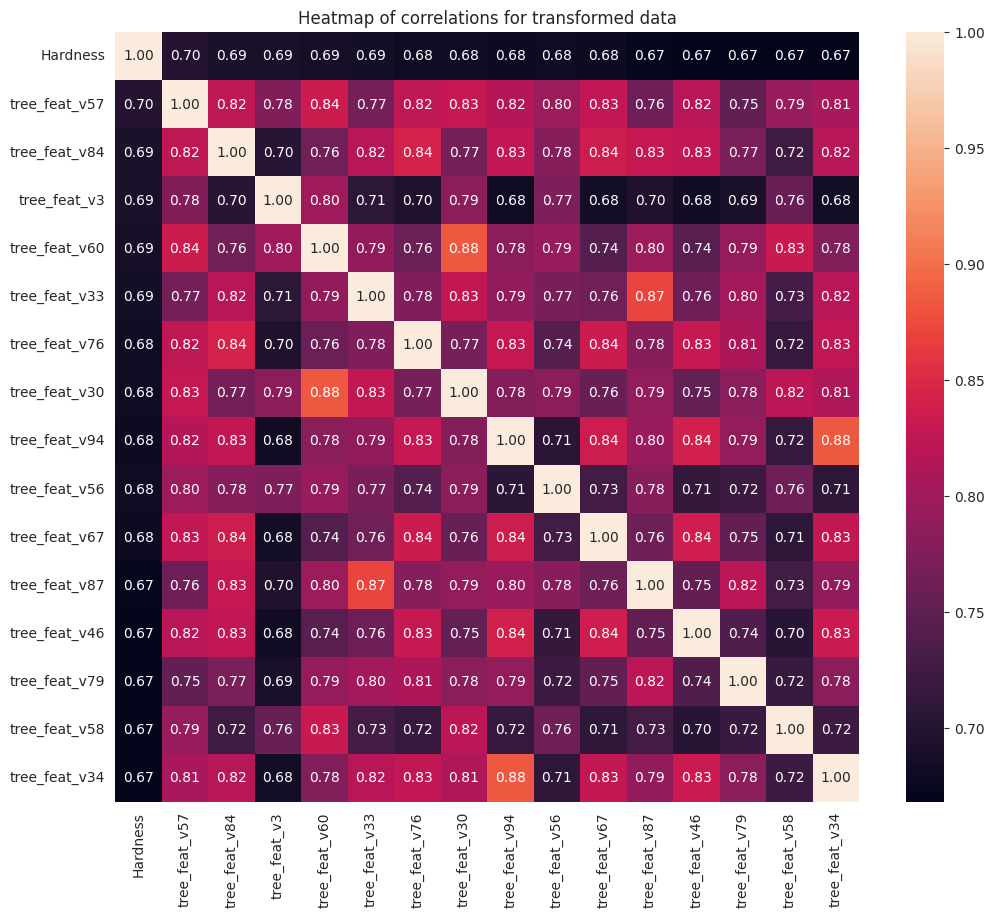

In [96]:
num_var = list(train_final[new_features].columns)
plt.figure(figsize=(12,10))
sns.heatmap(data=train_final[num_var].corr(), annot=True, fmt=".2f")
plt.title('Heatmap of correlations for transformed data');

In [91]:
new_features = ['tree_feat_v57','tree_feat_v3','tree_feat_v58','tree_feat_v56','tree_feat_v33','tree_feat_v94','tree_feat_v76','tree_feat_v87']

['tree_feat_v57',
 'tree_feat_v84',
 'tree_feat_v3',
 'tree_feat_v60',
 'tree_feat_v33',
 'tree_feat_v76',
 'tree_feat_v30',
 'tree_feat_v94',
 'tree_feat_v56',
 'tree_feat_v67',
 'tree_feat_v87',
 'tree_feat_v46',
 'tree_feat_v79',
 'tree_feat_v58',
 'tree_feat_v34']

In [97]:
pairs = [('tree_feat_v57', 'tree_feat_v3'),
         ('tree_feat_v57','tree_feat_v58'),
         ('tree_feat_v3','tree_feat_v33'),
         ('tree_feat_v56','tree_feat_v58'),
         ('tree_feat_v33','tree_feat_v56'),
         ('tree_feat_v33','tree_feat_v58'),
         ('tree_feat_v57','tree_feat_v56')]

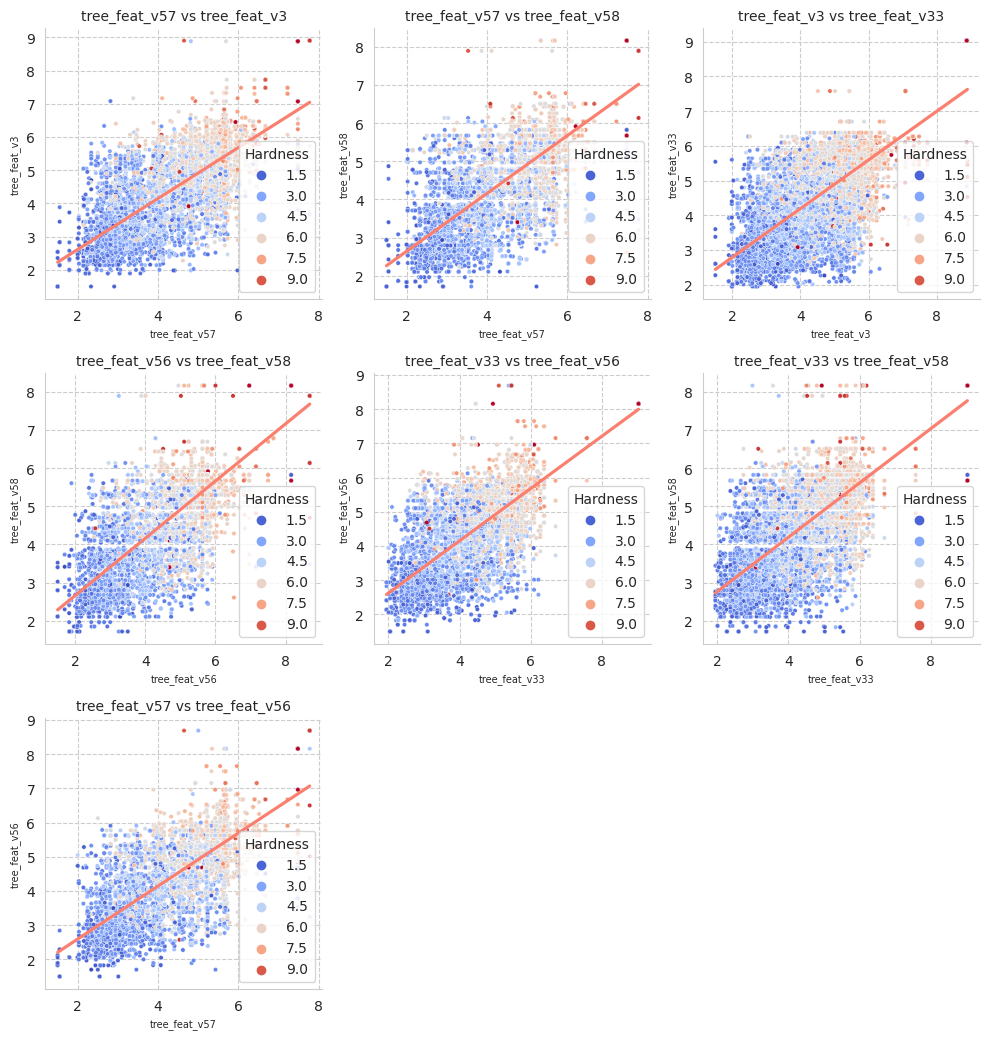

In [98]:
scatter_plot_high_corr_pair(data_set=train_final, target=target, variable_pairs=pairs)

In [ ]:
check_corr_features = ["R_vdw_element_Average","val_e_Average", 'Hardness']
X_check = train_.loc[:,check_corr_features]
X_check.corr()

R_vdw_element_Average  val_e_Average  Hardness
R_vdw_element_Average               1.000000      -0.031580 -0.194138
val_e_Average                      -0.031580       1.000000  0.109893
Hardness                           -0.194138       0.109893  1.000000

#### 4.2.1 Features 0

In [ ]:
tree_features = ["R_vdw_element_Average","val_e_Average"]
X_train = train_.loc[:,tree_features]
y_train = train_.loc[:,"Hardness"]

param_grid = {"max_depth": [7,8,9,10,11,12,13,14,15,20],
              "min_samples_split":[2,6,10,12,15,20],
              "min_samples_leaf":[1,2,3,6,10,15]
              }

#tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=3)
#tree_model.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.075 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.092 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.116 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.096 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.050 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.075 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.091 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.115 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.095 total time=   0.0s
[CV 5/5] END max_depth=7, min_sample

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 6, 10, 15],
                         'min_samples_split': [2, 6, 10, 12, 15, 20]},
             scoring='neg_mean_absolute_error', verbose=3)

In [ ]:
tree_model.best_score_,tree_model.best_params_

(-1.0476567943232329,
 {'max_depth': 14, 'min_samples_leaf': 10, 'min_samples_split': 2})

In [ ]:
#estimator = tree_model.best_estimator_

current_directory = os.getcwd()

#os.chdir("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/feat_eng")
#joblib.dump(estimator, "tree_feature_model_v0.joblib")
#os.chdir(current_directory)

os.chdir("//content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/feat_eng")
estimator = joblib.load("tree_feature_model_v0.joblib")
os.chdir(current_directory)

In [ ]:
train_["tree_feat_v0"] = estimator.predict(train_[tree_features])
test_["tree_feat_v0"] = estimator.predict(test_[tree_features])

In [ ]:
for var in tree_features + ["tree_feat_v0"]:
  corr = np.corrcoef(train_[var], train_["Hardness"])[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between R_vdw_element_Average and the target: -0.194
Correlation between val_e_Average and the target: 0.11
Correlation between tree_feat_v0 and the target: 0.641


#### 4.2.2 Features 1

In [ ]:
tree_features = ["density_per_valence","density_Average"]
X_train = train_.loc[:,tree_features]
y_train = train_.loc[:,"Hardness"]

param_grid = {"max_depth": [7,8,9,10,11,12,13,14,15,20],
              "min_samples_split":[2,6,10,12,15,20],
              "min_samples_leaf":[1,2,3,6,10,15]
              }

tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=3)
tree_model.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.162 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.129 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.161 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.145 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.163 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.162 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.129 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.162 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.145 total time=   0.0s
[CV 5/5] END max_depth=7, min_sample

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 6, 10, 15],
                         'min_samples_split': [2, 6, 10, 12, 15, 20]},
             scoring='neg_mean_absolute_error', verbose=3)

In [ ]:
tree_model.best_score_,tree_model.best_params_

(-1.120231572965974,
 {'max_depth': 14, 'min_samples_leaf': 15, 'min_samples_split': 2})

In [ ]:
import joblib

#estimator = tree_model.best_estimator_

current_directory = os.getcwd()

#os.chdir("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/feat_eng")
#joblib.dump(estimator, "tree_feature_model_v1.joblib")
#os.chdir(current_directory)

os.chdir("//content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/feat_eng")
estimator = joblib.load("tree_feature_model_v1.joblib")
os.chdir(current_directory)

In [ ]:
train_["tree_feat_v1"] = estimator.predict(train_[tree_features])
test_["tree_feat_v1"] = estimator.predict(test_[tree_features])

In [ ]:
for var in tree_features + ["tree_feat_v1"]:
  corr = np.corrcoef(train_[var], train_["Hardness"])[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between density_per_valence and the target: -0.263
Correlation between density_Average and the target: -0.309
Correlation between tree_feat_v1 and the target: 0.622


#### 4.2.3 Features 2

In [ ]:
tree_features = ["zaratio_Average","val_e_Average"]
X_train = train_.loc[:,tree_features]
y_train = train_.loc[:,"Hardness"]

param_grid = {"max_depth": [7,8,9,10,11,12,13,14,15,20],
              "min_samples_split":[2,6,10,12,15,20],
              "min_samples_leaf":[1,2,3,6,10,15]
              }

tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0), cv = 5, scoring ="neg_mean_absolute_error", param_grid = param_grid, verbose=3)
tree_model.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.015 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.027 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.040 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-1.034 total time=   0.0s
[CV 5/5] END max_depth=7, min_samples_leaf=1, min_samples_split=2;, score=-0.994 total time=   0.0s
[CV 1/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.016 total time=   0.0s
[CV 2/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.027 total time=   0.0s
[CV 3/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.040 total time=   0.0s
[CV 4/5] END max_depth=7, min_samples_leaf=1, min_samples_split=6;, score=-1.034 total time=   0.0s
[CV 5/5] END max_depth=7, min_sample

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [7, 8, 9, 10, 11, 12, 13, 14, 15, 20],
                         'min_samples_leaf': [1, 2, 3, 6, 10, 15],
                         'min_samples_split': [2, 6, 10, 12, 15, 20]},
             scoring='neg_mean_absolute_error', verbose=3)

In [ ]:
tree_model.best_score_,tree_model.best_params_

(-0.9967154935386671,
 {'max_depth': 12, 'min_samples_leaf': 10, 'min_samples_split': 2})

In [ ]:
import joblib

#estimator = tree_model.best_estimator_

current_directory = os.getcwd()

#os.chdir("/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/feat_eng")
#joblib.dump(estimator, "tree_feature_model_v2.joblib")
#os.chdir(current_directory)

os.chdir("//content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E25_Mohs_Hardness/feat_eng")
estimator = joblib.load("tree_feature_model_v2.joblib")
os.chdir(current_directory)

In [ ]:
train_["tree_feat_v2"] = estimator.predict(train_[tree_features])
test_["tree_feat_v2"] = estimator.predict(test_[tree_features])

In [ ]:
for var in tree_features + ["tree_feat_v2"]:
  corr = np.corrcoef(train_[var], train_["Hardness"])[0, 1]
  corr = np.round(corr, 3)
  print( f"Correlation between {var} and the target: {corr}")

Correlation between zaratio_Average and the target: -0.012
Correlation between val_e_Average and the target: 0.11
Correlation between tree_feat_v2 and the target: 0.671


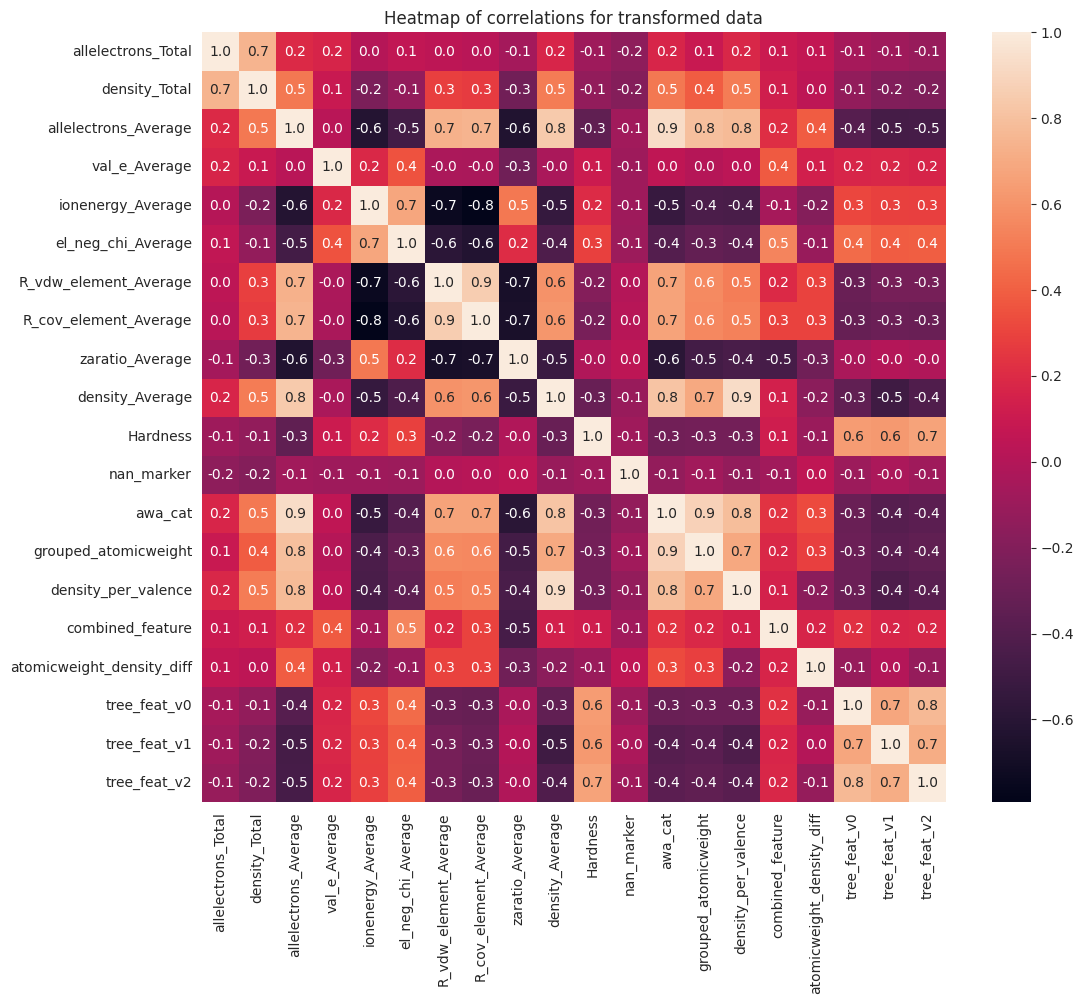

In [ ]:
num_var = list(train_.columns)
plt.figure(figsize=(12,10))
sns.heatmap(data=train_[num_var].corr(), annot=True, fmt=".1f")
plt.title('Heatmap of correlations for transformed data');